# Aula 1 explorando dados com pandas.

In [42]:
import pandas as pd

In [ ]:
# # Importando os dados para a pasta do projeto
# df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

# df.to_csv('../dados/salaries.csv', index=False)

# Carregando os dados

In [44]:
df = pd.read_csv('../dados/salaries.csv')


## Lendo as primeira linhas
De cara já é possível perceber algumas informaçòes fora do padrão:

1.   work_year está em float, mas deveria estar em date ou string.
2.   remote_ratio parece uma verificação booleana de sim (100) ou não (0) para trabalho remoto. *(mas não é. vendo as ultimas linhas com o df.head(-5) percebe-se que há valores com 50, ou seja, é uma proporção mesmo)*




In [45]:
df.head(5)
df.head(-5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
133339,2021.0,SE,FT,Data Scientist,168000,USD,168000,JP,0,JP,S
133340,2021.0,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
133341,2021.0,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
133342,2021.0,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L


# Informações da tabela


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


# Descreve os dados através de estatisticas descritivas

In [47]:
df.describe()
# df.describe(include="all")
# df.describe(include="object")

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


# Retorna o "formato" do dataframe (linhas, colunas).
Por ser atributo, nao usa parentesis no final (método)

In [48]:
df.shape

(133349, 11)

In [49]:
linhas, colunas = df.shape[0], df.shape[1]
print("linhas:", linhas)
print("colunas:", colunas)

linhas: 133349
colunas: 11


# Renomeando as colunas para português.

In [50]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [51]:
renomear_colunas = {
    'work_year':'ano',
    'experience_level': 'senioridade',
    'employment_type':'contrato',
    'job_title':'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location':'empresa',
    'company_size': 'tamanho_empresa'
}

df = df.rename(columns=renomear_colunas)

In [52]:
#Renomeando valores para melhorar legibilidade

df["senioridade"].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [53]:
substituir_senioridade = {
    "SE": "Senior",
    "MI": "Pleno",
    "EN": "Junior",
    "EX": "Executivo"
}

df["senioridade"] = df["senioridade"].map(substituir_senioridade)
df["senioridade"].value_counts()

senioridade
Senior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [54]:
df['contrato'].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [55]:
substituir_contrato = {
    'FT': 'Tempo Integral',
    'PT': 'Tempo Parcial',
    'FL': 'Freelance',
    'CT': 'Contrato'
}

df['contrato'] = df['contrato'].map(substituir_contrato)
df['contrato'].value_counts()

contrato
Tempo Integral    132563
Contrato             394
Tempo Parcial        376
Freelance             16
Name: count, dtype: int64

In [56]:
df['tamanho_empresa'].value_counts()

tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [57]:
substituir_tamanho_empresa = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
}

df['tamanho_empresa'] = df['tamanho_empresa'].map(substituir_tamanho_empresa)
df['tamanho_empresa'].value_counts()

tamanho_empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [58]:
df['remoto'].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

In [59]:
substituir_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].map(substituir_remoto)
df['remoto'].value_counts()


remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64

In [60]:
df.head(5)

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


#descreve os dados depois de mudar
top = mostra a linha mais frequente.
freq = quantas vezes essa linha se repetiu

In [61]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


#Aula 2 Aprenda a limpar e preparar os dados

In [62]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


# Código para retornar a soma dos nulos em cada campo.

In [63]:
df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [64]:
#mostra valores unicos da coluna no formato lista
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

#retornando linhas com nulo em qualquer coluna "eixo"

In [65]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


# Exemplo de como preencher dados NaN (not a number)

In [66]:
import numpy as np

df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruna', 'Carlos','Daniele','Val'],
    'salario': [ 4000, np.nan, 5000, np.nan, 100000]
})

#calcula a media salarial e substitui os nulos pela média e arredonda os valores
df_salarios['salario_medio'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_medio,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruna,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [67]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda","Terça","Quarta","Quinta","Sexta"],
    "Temperatura": [30, np.nan, 28, np.nan, 27]
})
'''método ffill()  forward fill preenche com o proximo valor
 e o método bfill() back fill preenche com o valor anterior.
'''

df_temperaturas["preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas["preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill,preenchido_bfill
0,Segunda,30.0,30.0,30.0
1,Terça,NaN,30.0,28.0
2,Quarta,28.0,28.0,28.0
3,Quinta,NaN,28.0,27.0
4,Sexta,27.0,27.0,27.0


In [68]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruna', 'Carlos','Daniele','Val'],
    'cidades': [ "São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

df_cidades["cidade_preenchida"] = df_cidades["cidades"].fillna("Não informado")
display(df_cidades)

,nome,cidades,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruna,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


#método .dropna() remove todas as linhas com NaN

In [69]:
df_limpo = df.dropna()
df_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

# troca de tipo de variavel, na coluna ano, de float64 para int64


In [70]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [71]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [72]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


#Aula 3 - Visualização de dados


In [73]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [75]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

#Biblioteca Seaborn: biblioteca de graficos

<Axes: xlabel='senioridade', ylabel='usd'>

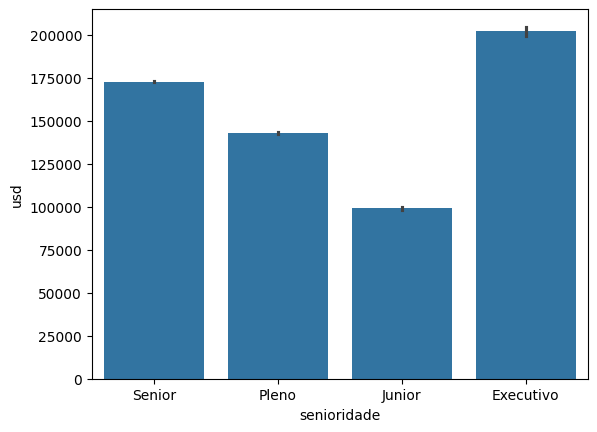

In [ ]:
import seaborn as sns

sns.barplot(data= df_limpo, x='senioridade', y='usd')

'esse grafico abaixo mostra os valores do método describe na coluna ano, salario e usd.\n então o que parecia igual a um primeiro momento (salario e usd) e q se mostrou diferente no info() com formatação cientifica e decimal,\nna verdade se explica pela coluna salario ter um valor muito alto e fora da curva, dai o método describe mostra como notação cientifica'

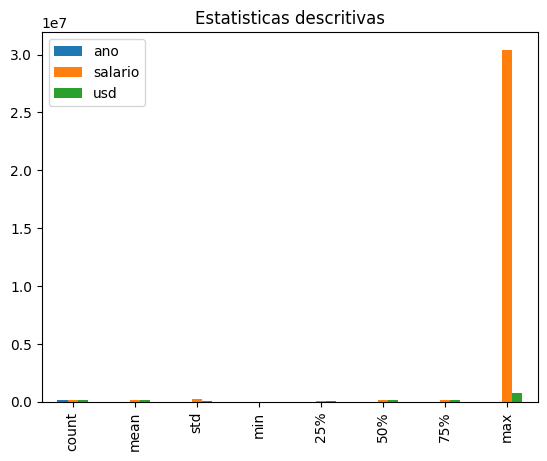

In [ ]:
df_limpo.describe().plot(kind='bar', title='Estatisticas descritivas')
# df_limpo[['salario', 'usd']].corr()
#exibe a correlação entre as duas colunas

'''esse grafico abaixo mostra os valores do método describe na coluna ano, salario e usd.
 então o que parecia igual a um primeiro momento (salario e usd) e q se mostrou diferente no info() com formatação cientifica e decimal,
na verdade se explica pela coluna salario ter um valor muito alto e fora da curva, dai o método describe mostra como notação cientifica'''

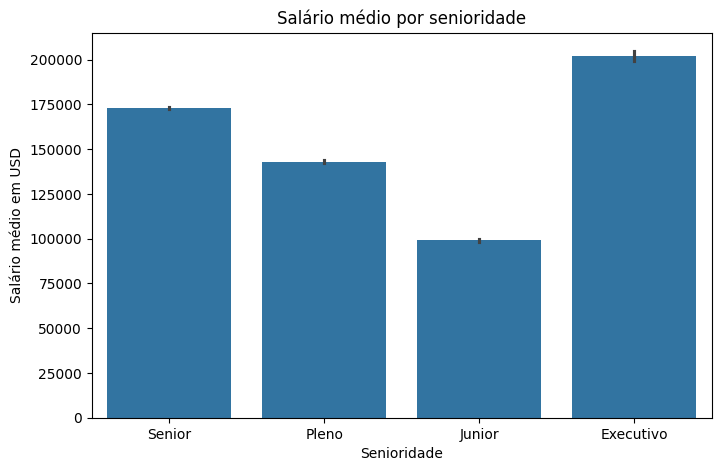

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio em USD")

plt.show()

#testar valores médios para coluna de 'usd' e ver se batem com os valores daqui
#bateu sim

In [ ]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)
#minuto27


,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [ ]:
#criando uma variável de ordem
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index

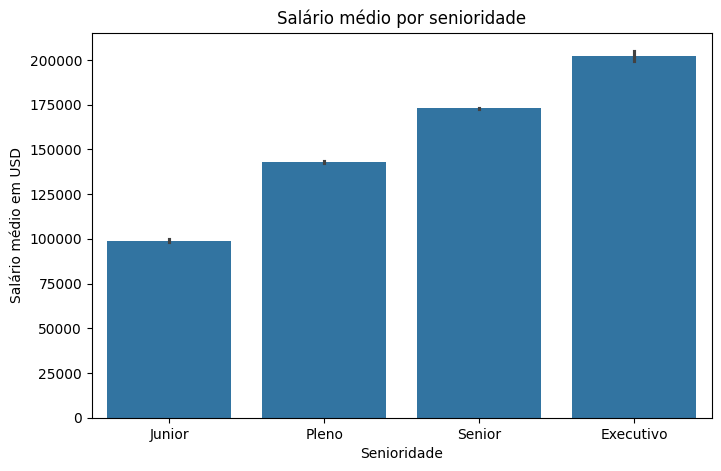

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio em USD")

plt.show()


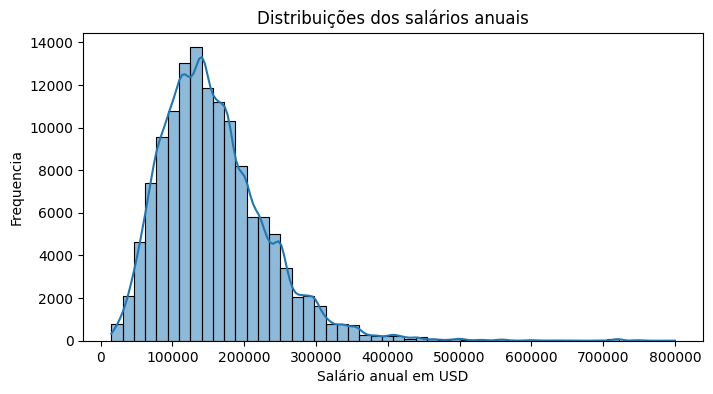

In [ ]:
plt.figure(figsize=(8,4))

#kde é a linha
sns.histplot(df_limpo['usd'], bins=50, kde=True)
plt.title("Distribuições dos salários anuais")
plt.xlabel("Salário anual em USD")
plt.ylabel("Frequencia")

sns.histplot()
plt.show()

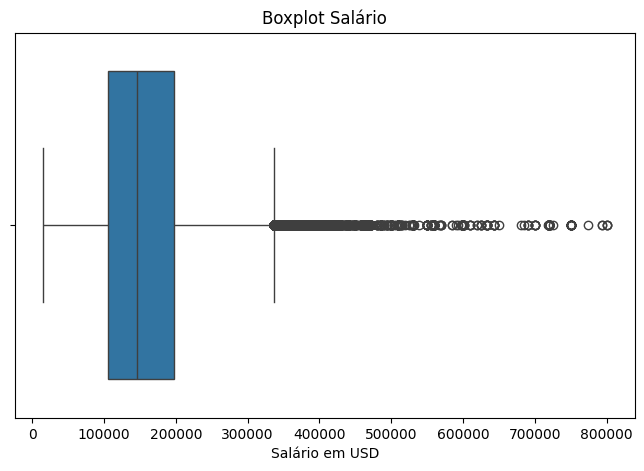

'Mínimo: é o menor valor. [primeira linha]\n• Primeiro quartil (Q1 ou Percentil 25): 25% dos dados são menores que ou iguais a este valor. [ entre primeira linha e parede azul esquerda]\n• Segundo quartil (Q2 ou Percentil 50): corresponde ao valor central de um conjunto de valores ordenado, sendo uma medida de tendência central. 50% dos dados são menores que ou iguais a este valor. [valores da coluna em azul]\n• Terceiro quartil (Q3 ou Percentil 75): 75% dos dados são menores que ou iguais a este valor. [parede direita]\n• Máximo: é o maior valor. [ultima linha fora da coluna azul]\n'

In [ ]:
#boxplot minutagem  42:00
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")

plt.show()

'''Mínimo: é o menor valor. [primeira linha]
• Primeiro quartil (Q1 ou Percentil 25): 25% dos dados são menores que ou iguais a este valor. [ entre primeira linha e parede azul esquerda]
• Segundo quartil (Q2 ou Percentil 50): corresponde ao valor central de um conjunto de valores ordenado, sendo uma medida de tendência central. 50% dos dados são menores que ou iguais a este valor. [valores da coluna em azul]
• Terceiro quartil (Q3 ou Percentil 75): 75% dos dados são menores que ou iguais a este valor. [parede direita]
• Máximo: é o maior valor. [ultima linha fora da coluna azul]
'''

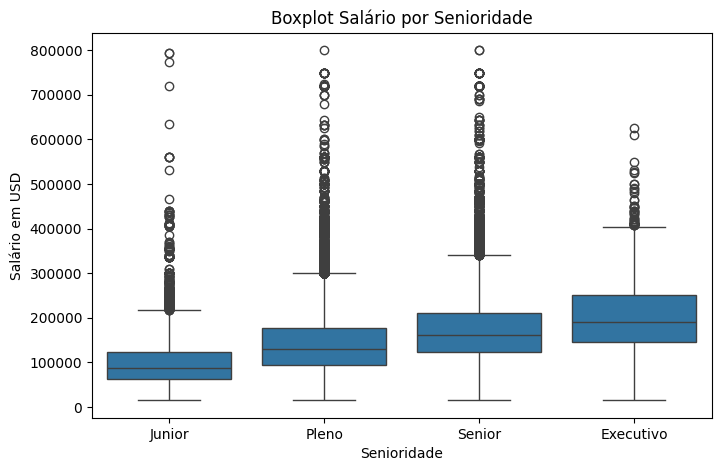

In [ ]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data = df_limpo, order=ordem_senioridade)
plt.title("Boxplot Salário por Senioridade")

plt.xlabel("Senioridade")
plt.ylabel("Salário em USD")

plt.show()

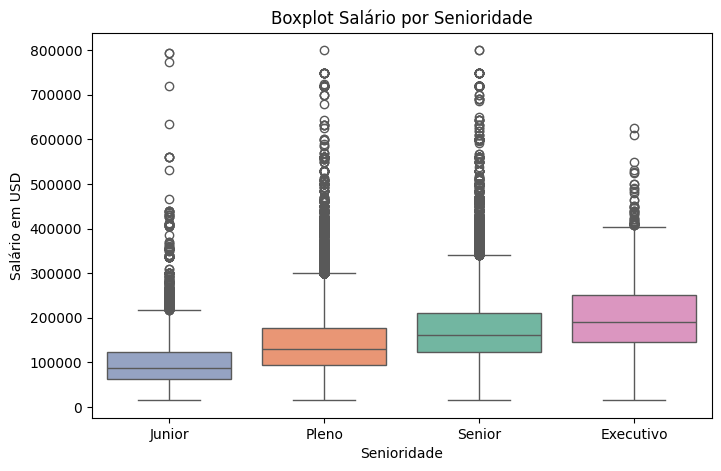

In [ ]:
#mudando as cores

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data = df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Boxplot Salário por Senioridade")

plt.xlabel("Senioridade")
plt.ylabel("Salário em USD")

plt.show()

In [ ]:
import plotly.express as px

In [ ]:
#prompt: Crie um gráfico de média salarial por senioridade em barras, usando o plotly

senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Senioridade', 'usd': 'Média Salarial em USD'})
fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Distribuição de Tipo de Trabalho Remoto',
            #  labels={'tipo_trabalho': 'Tipo de Trabalho Remoto', 'quantidade': 'Quantidade'}
             )

fig.show()

In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
df_limpo.to_csv('dados_imersao_final.csv', index=False)

In [ ]:
!pip install pycountry
#biblioteca para transformar a coluna ['residencia'] para sistema de 3 letras

In [ ]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()